In [1]:
from matplotlib import pyplot as plt
import numpy as np

from fedhex import RootLoader
from fedhex import io as fxio

Welcome to JupyROOT 6.30/02


2024-01-18 00:00:07.848542: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
root_path = "./root/100x100box_200events/"
rl = RootLoader(path=root_path)

tree_name = "Events"
data_vars = ["phi", "omega"]
cond_vars = ["labelphi", "labelomega"]
cutstr = "CBL_Region == 1 and Photon_pt[CBL_RecoPhi_photonindex] > 220"
defs = {
    "phi": "CBL_RecoPhi_mass", 
    "labelphi": "GenPhi_mass[0]",
    "omega": "TwoProng_massPi0[CBL_RecoPhi_twoprongindex]",
    "labelomega": "GenOmega_mass[0]"
}

thresh = 150
samples, labels = rl.load(
    tree_name=tree_name,
    data_vars=data_vars,
    cond_vars=cond_vars,
    cutstr=cutstr,
    defs=defs,
    event_thresh=thresh)

data, cond = rl.preproc()

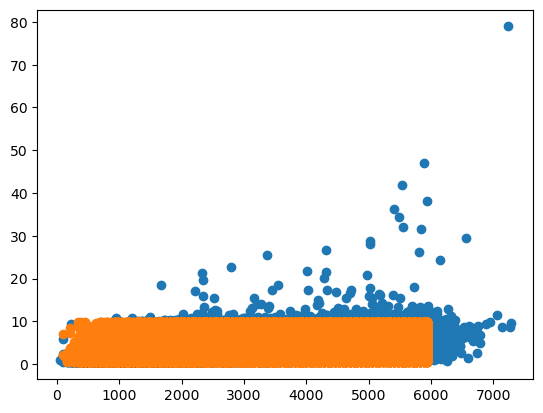

In [3]:
plt.scatter(samples[:,0], samples[:,1])
plt.scatter(labels[:,0], labels[:,1])

In [4]:
save_path = "temp.root"
save_tree = "tree"
fxio.save_root(
    path=save_path,
    tree_name=save_tree,
    trn_samples=samples,
    trn_labels=labels)

True

In [5]:
# This is for trying to re-load what was just saved. Not working yet.
# save_data_vars = ["data"]
# save_cond_vars = ["cond"]
# save_defs = {}
# save_cutstr = ""
# save_event_thresh = 0
# save_max_depth = 1
# samples, labels = fxio.load_root(root_dir=".",
#                tree_name=save_tree,
#                data_vars=save_data_vars,
#                cond_vars=save_cond_vars,
#                defs=save_defs,
#                cutstr=save_cutstr,
#                event_thresh=save_event_thresh,
#                max_depth=save_max_depth)